# Assignment Week 6
## Group Assignment (Group 10)

#### 1. We can define the second difference matrix as follows ($N=5$ for example):
$$
 A = \begin{pmatrix}
 2 &-1  &  & &\\
  -1 & 2 &-1  & \\
  & -1 & 2 &-1  \\
  & & -1  &2 &-1 \\
  & & & -1 & 2
 \end{pmatrix}
$$

#### a) Let the true solution $x_a$ be generated by the normal distributed random numbers, thus $b = Ax$.

In [1]:
from numpy import *

# produce the matrix A
n = 5  # number of dimensions
A = 2*eye(n)-eye(n, k=1)-eye(n, k=-1)

# the true solution
xa = random.randn(len(A))

b = dot(A, xa)

print('Produced:')
print('x_a =',xa)
print('b =',b)

Produced:
x_a = [ 1.21835322  0.78160492 -0.73987456 -1.28526074  1.30104893]
b = [ 1.65510153  1.08473118 -0.97609331 -3.13169584  3.88735859]


#### b) The convergence condition can be set as $||x_{n+1} − x_n|| \leq \epsilon$ for some small value of $\epsilon$. Choose your own $\epsilon$, try to modify the sample script `jacobi_method.ipynb` to count how many loop iterations occur before convergence. How does it change with the change of $N$? 

In [2]:
from numpy import *

# the Jacobi method
# the default tolerance eps=1e-8
def jacobi(A, b, eps=1e-8, x=None):
    # create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros(len(A))

    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = diag(A)
    R = A - diagflat(D)
    
    # iterate
    last = x
    x = (b - dot(R,x)) / D
    present = x
    count = 1
    while linalg.norm(present - last) > eps:
        last = present
        x = (b - dot(R,x)) / D
        present = x
        count += 1
        
    return x, count

print('The true solution is\n', xa)
sol, count = jacobi(A, b)
print('The solution determined by the Jacobi method is\n', sol)
print('The number of iterations is %d.' % count)

The true solution is
 [ 1.21835322  0.78160492 -0.73987456 -1.28526074  1.30104893]
The solution determined by the Jacobi method is
 [ 1.21835322  0.78160492 -0.73987457 -1.28526074  1.30104893]
The number of iterations is 130.


Now we change the value of $N$ and plot the number of iterations versus $N$.

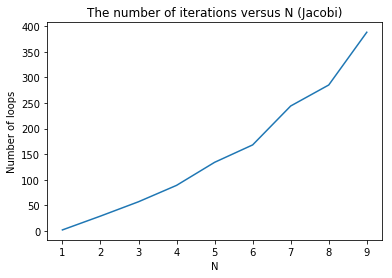

In [3]:
from matplotlib.pyplot import *
%matplotlib inline

loop_number = []
N = range(1,10)

# calculate the number of loops for different N's
for n in N:
    # the matrix A
    A = 2*eye(n)-eye(n, k=1)-eye(n, k=-1)

    # the true solution
    xa = random.randn(len(A))

    b = dot(A, xa)

    # solve the equation
    sol, count = jacobi(A, b)
    
    loop_number.append(count)

# plot the loop number versus N
plot(N, loop_number)
title('The number of iterations versus N (Jacobi)')
xlabel('N')
ylabel('Number of loops')
show()

#### c) The weighted Jacobi method uses a parameter $\omega$ to compute the iteration as
$$
 \mathbf {x} ^{(k+1)}=\left(1-\omega \right)\mathbf {x} ^{(k)}+ \omega\mathbf {x} ^{(k+1)}_{\text{Jacobi}}=\left(1-\omega \right)\mathbf {x} ^{(k)}+ \omega D^{-1}(\mathbf {b} -(L+U)\mathbf {x} ^{(k)})
$$
#### with $\omega =2/3$ being the usual choice. Modify your script to implement the weighted Jacobi method. Does it converge faster than the Jacobi method?

In [4]:
from numpy import *

# the weighted Jacobi method
# the default weight w=2/3
# the default tolerance eps=1e-8
def w_jacobi(A, b, w=2/3, eps=1e-8, x=None):
    # create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros(len(A))

    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = diag(A)
    R = A - diagflat(D)
    
    # iterate
    last = x
    x = (1 - w) * x + w * (b - dot(R,x)) / D
    present = x
    count = 1
    while linalg.norm(present - last) > eps:
        last = present
        x = (1 - w) * x + w * (b - dot(R,x)) / D
        present = x
        count += 1
        
    return x, count

Now we can implement `w_jacobi` to solve the problem with different values of $\omega$.

In [5]:
n = 5
A = 2*eye(n)-eye(n, k=1)-eye(n, k=-1)

# the true solution
xa = random.randn(len(A))

b = dot(A, xa)

# solve the equation
# w = 2/3
sol, count = w_jacobi(A, b, w=2/3)

print('Number of iterations (w = 2/3):', count)

Number of iterations (w = 2/3): 160


We find that the usual choice $\omega=2/3$ *cannot* make the convergence faster.

However, if $\omega$ is set to be slightly smaller than $1$, around $\mathbf{0.98}$, the convergence indeed becomes faster:

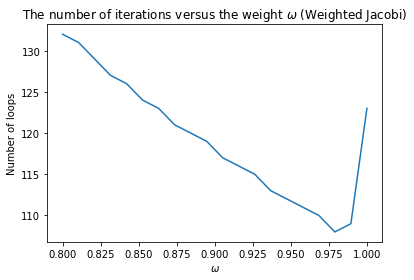

In [6]:
# produce A, b, x_a
n = 5
A = 2*eye(n)-eye(n, k=1)-eye(n, k=-1)
xa = random.randn(len(A))
b = dot(A, xa)

w_list = linspace(0.8,1,20)
count_list = []
for v in w_list:
    sol, count = w_jacobi(A, b, w=v)
    count_list.append(count)

# plot the number of iterations versus w
plot(w_list, count_list)
title(r'The number of iterations versus the weight $\omega$ (Weighted Jacobi)')
xlabel(r'$\omega$')
ylabel('Number of loops')
show()

#### 2. Apply the Gauss-Seidel method to solve the linear equations given in Problem 1.
#### a)  Choose your own $\epsilon$, try to modify the sample script `gauss_seidel_method.ipynb` to count the executing time before convergence. How does it change with the change of $N$? 

Gauss-Seidel method to solve Ax=b

In [7]:
from pprint import pprint
from numpy import array, zeros, zeros_like, dot, allclose

def gauss_seidel(A, b, N=500, x=None):
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros_like(b)

    # Iterate for N times  
    for count in range(N):
        x_new = zeros_like(x)
        for i in range(A.shape[0]):
            s1 = dot(A[i, :i], x_new[:i])
            s2 = dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if allclose(x, x_new, rtol=1e-8):
            break
        x = x_new
    return x, count

We change the value of $N$ and plot the number of iterations versus $N$.

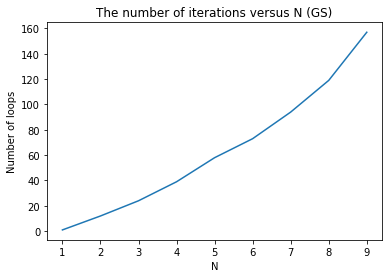

In [8]:
from matplotlib.pyplot import *

loop_number = []
N = range(1,10)

# calculate the number of loops for different N's
for n in N:
    # the matrix A
    A = 2*eye(n)-eye(n, k=1)-eye(n, k=-1)

    # the true solution
    xa = random.randn(len(A))

    b = dot(A, xa)

    # solve the equation
    sol, count = gauss_seidel(A,b)
    
    loop_number.append(count)

# plot the loop number versus N
plot(N, loop_number)
title('The number of iterations versus N (GS)')
xlabel('N')
ylabel('Number of loops')
show()

#### b) Does Gauss-Seidel method converge, as expected, faster than the Jacobi method?

Comparing the two plots, we can come to conclution that Gauss-Seidel method converges faster than the Jacobi method.

We can know the reason from *Gauss_Seidel_method_Wikipedia.pdf* :
'The computation of x(k+1) uses the elements of x(k+1) that have already been computed, and only the elements of x(k) that have not been computed in the k+1 iteration. This means that, unlike the Jacobi method, only one storage vector is required as elements can be overwritten as they are computed, which can be advantageous for very large problems.' 

Therefore, when N is large, Gauss-Seidel method is much faster than the Jacobi method.


#### 3. The method of successive over-relaxation (SOR) is a variant of the Gauss–Seidel method for solving a linear system of equations, resulting in faster convergence, where the iterative is defined as
$$
\begin{aligned}
\mathbf{x}^{(k+1)}&= (1-\omega)\mathbf{x}^{(k)}+\omega \mathbf{x}^{(k+1)}_{\text{Gauss-Seidel}}\\
x_i^{(k+1)}&=(1-\omega)x_i^{(k)}+\frac{\omega}{a_{ii}}\left(b_i-\displaystyle\sum_{j<i}a_{ij}x_j^{(k+1)}-\displaystyle\sum_{j>i}a_{ij}x_j^{(k)}\right)
\end{aligned}
$$

#### where $0<\omega <2$. $\omega >1$ is called the relaxation factor. 
#### Consider the linear system as follows:
$$
\begin{cases}
3x_1 - x_2+ x_3 = -1\\
-x_1 +3x_2 -x_3 = 7\\
x_1 - x_2 +3x_3 = -7\\
   \end{cases}
$$


#### a) Set your own $\epsilon$, try to modify the sample script `gauss_seidel_method.ipynb` to implement the SOR method.

In [9]:
from numpy import *

# SOR method
# the default relaxation factor w=1.1
# the default tolerance eps=1e-8
def SOR(A, b, w=1.1, N=1000, eps=1e-8, x=None):
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros_like(b)

    # Iterate for N times  
    for it_count in range(N):
        x_new = zeros_like(x)
        
        for i in range(A.shape[0]):
            s1 = dot(A[i, :i], x_new[:i])
            s2 = dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (1 - w) * x[i] + w * (b[i] - s1 - s2) / A[i, i]
        
        if allclose(x, x_new, rtol=eps):
            break
        
        x = x_new
    
    return x, it_count


Now we can implement the SOR method to solve the linear equations.
$$
\mathbf{A}=
\left(
\begin{matrix}
3&-1&1\\
-1&3&-1\\
1&-1&3
\end{matrix}
\right),\quad
\mathbf{b}=
\left(
\begin{matrix}
-1\\
7\\
-7
\end{matrix}
\right)
$$
$$
\mathbf{D}=
\left(
\begin{matrix}
3&0&0\\
0&3&0\\
0&0&3
\end{matrix}
\right),\quad
\mathbf{L}=
\left(
\begin{matrix}
0&0&0\\
-\frac{1}{3}&0&0\\
\frac{1}{3}&-\frac{1}{3}&0
\end{matrix}
\right),\quad
\mathbf{R}=
\left(
\begin{matrix}
0&-\frac{1}{3}&\frac{1}{3}\\
0&0&-\frac{1}{3}\\
0&0&0
\end{matrix}
\right)
$$

In [10]:
A = array([[3.,-1.,1.],[-1.,3.,-1.],[1.,-1.,3.]])
b = array([-1., 7., -7.])
sol, count = SOR(A,b, w=1.1,eps=1e-9,x=array([1.,1.,1.]))
print('The solution is',sol)
print('Number of iterations:',count)

The solution is [ 1.          1.99999999 -2.        ]
Number of iterations: 13


#### b) Can you find the optimal value of $\omega$ empirically? Please compare your result with the theoretical prediction - the optimal relaxation parameter $\omega$ is given by
$$
 \omega_\text{opt} = 1+\left(\frac{\lambda_J}{1+\sqrt{1-\lambda_J^2}}\right)^2 
$$

#### $\lambda_J$ is the spectral radius calculated  in the Jacobi method.

First calculate $\omega_{\rm opt}$.
$$
\mathbf{J}=\mathbf{D}^{-1}(\mathbf{L}+\mathbf{R})=
\left(
\begin{matrix}
3&0&0\\
0&3&0\\
0&0&3
\end{matrix}
\right)^{-1}
\left(
\begin{matrix}
0&-1&1\\
-1&0&-1\\
1&-1&0
\end{matrix}
\right)=
\left(
\begin{matrix}
0&-\frac{1}{3}&\frac{1}{3}\\
-\frac{1}{3}&0&-\frac{1}{3}\\
\frac{1}{3}&-\frac{1}{3}&0
\end{matrix}
\right)
$$

In [11]:
from numpy import *

J = array([[0,-1/3,1/3],[-1/3,0,-1/3],[1/3,-1/3,0]])
D, v = linalg.eig(J)

lamJ = max(abs(D))

w_opt = 1 + (lamJ / (1 + sqrt(1 - lamJ**2)))**2
print('The optimal w should be', w_opt)

The optimal w should be 1.1458980337503155


So $\omega_{\rm opt}\approx 1.146$.

In [12]:
A = array([[3.,-1.,1.],[-1.,3.,-1.],[1.,-1.,3.]])
b = array([-1., 7., -7.])
sol, count = SOR(A,b, w=1.146,eps=1e-9,x=array([1.,1.,1.]))
print('The solution is',sol)
print('Number of iterations:',count)

The solution is [ 1.00000001  2.00000001 -2.        ]
Number of iterations: 14


It takes 14 steps before convergence when $\omega=1.146$. However, it takes only 13 steps when $\omega=1.11$ or $\omega=1$ (the GS method). When $\omega>1.146$, the number of iterations becomes larger. Although $\omega=1.146$ is not the true optimal choice of $\omega$, the number of iterations at $\omega=1.146$ doesn't deviate much from the optimized number of iterarions.

#### 4. One application of the conjugate gradient method is to solve the normal equation to find the least-square solution of an (over-determined) equation system $\mathbf{A}\mathbf{x}=\mathbf{b}$, where the coefficient matrix $\mathbf{A}$ is $M$ by $N$ of rank $n$, i.e., $M\geq N=n$.The normal equation of this system is 
$$
\mathbf{A}^{T}\mathbf{A}\mathbf{x}=\mathbf{A}^{T}\mathbf{b}% 
$$
#### Here $\mathbf{A}^{T}\mathbf{A}$ is an $N$ by $N$ symmetric, positive definite matrix. When $A$ is a large-sized sparse symmetrical matrix, conjugate gradient method is also preferred. 
#### Modify the sample script  `conj_grad.ipynb` to solve Problem 1. Please compare your results with the results from the Jacobi method and the Cholesky method. 

Conjugate gradient method to solve $Ax=b$:

In [13]:
import numpy as np
from scipy.sparse.linalg import cg

def conjugate_grad(A, b, x=None):
    n = len(b)
    if not x:
        x = np.ones(n)
    r = b - np.dot(A, x)
    p = r
    r_k_norm = np.dot(r, r)
    for i in range(500):
        Ap = np.dot(A, p)
        alpha = r_k_norm / np.dot(p, Ap)
        x += alpha * p
        r -= alpha * Ap
        r_kplus1_norm = np.dot(r, r)
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        if r_kplus1_norm < 1e-14:
            break
        p = r + beta * p
    return x,i   

We first assume that $N=5$

In [14]:
n = 5 
A = 2*eye(n)-eye(n, k=1)-eye(n, k=-1)

# the true solution
xa = random.randn(len(A))

b = dot(A, xa)

print('Produced:')
print('x_a =',xa)
print('b =',b)

Produced:
x_a = [-0.70870649 -0.9914193  -0.04936257  1.7138955  -0.846018  ]
b = [-0.42599369 -1.22476953 -0.82120134  4.32317156 -3.40593149]


In [15]:
print('The true solution is\n', xa)
sol, count = conjugate_grad(A, b)
print('The solution determined by the Conjugate gradient method is\n', sol)
print('The number of iterations is %d.' % count)

The true solution is
 [-0.70870649 -0.9914193  -0.04936257  1.7138955  -0.846018  ]
The solution determined by the Conjugate gradient method is
 [-0.7087065  -0.99141929 -0.04936254  1.71389551 -0.84601797]
The number of iterations is 20.


We change the value of $N$ and plot the number of iterations versus $N$.

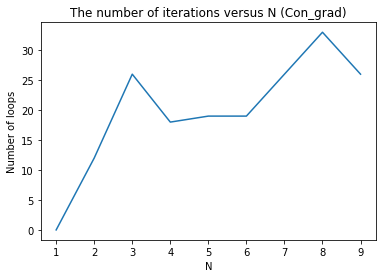

In [16]:
from matplotlib.pyplot import *

loop_number = []
N = range(1,10)

# calculate the number of loops for different N's
for n in N:
    # the matrix A
    A = 2*eye(n)-eye(n, k=1)-eye(n, k=-1)

    # the true solution
    xa = random.randn(len(A))

    b = dot(A, xa)

    # solve the equation
    sol, count = conjugate_grad(A,b)
    
    loop_number.append(count)

# plot the loop number versus N
plot(N, loop_number)
title('The number of iterations versus N (Con_grad)')
xlabel('N')
ylabel('Number of loops')
show()

When N is small, the conjugate gradient method converges as fast as Jacobi method and the Cholesky method. However, when N is large, the conjugate gradient method is much faster than Jacobi method and the Cholesky method.

#### 5. Read Example 7.2[^1] and the sample script `power_method_eig.ipynb`. The problem is to find the largest eigenvalue of matrix $A$:
$$
A = \begin{pmatrix}
4 & -i & 2 \\
i & 2 & 2+7i \\
2 & 2-7i & -2
\end{pmatrix}
$$

#### a) Try modifying the above example to count how many loop iterations occur before convergence. Is it larger or smaller than you had expected?  

In [17]:
import numpy as np

# function to calculate the Rayleigh quotient
def rayleigh_quotient(A,x):
    return np.dot(x, np.dot(A, x))/np.dot(x,x)

# function to normalise a vector
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N

A = np.array([[4, -1j, 2],
        [1j, 2, 2+7j],
        [2, 2-7j, -2]])

# choose the starting vector
x = normalise(np.array([1, 1, 1]))
RQnew = rayleigh_quotient(A,x)
RQold = 0

# perform the power iteration
count = 0
while np.abs(RQnew-RQold) > 1e-6:
    RQold = RQnew
    x = normalise(np.dot(A, x))
    RQnew = rayleigh_quotient(A, x)
    count += 1

print("Dominant eigenvector:\n", x)
print("Dominant eigenvalue: {:.5f}".format(RQnew))
print("Number of iterations:", count)

Dominant eigenvector:
 [0.33980972-0.23445694j 0.49134277+0.51067227j 0.50105938-0.27621533j]
Dominant eigenvalue: 8.45188+0.00000j
Number of iterations: 180


The number of iterations is larger than my expectation. Usually, for a $3\times 3$ real matrix, the number of iterations won't be larger than $30$ when applying the power method.

#### b) An alternative to using the Rayleigh quotient to determine whether convergence is achieved is the convergence criterion 
$$
||x_{n+1} − x_n|| \leq \epsilon
$$

#### This is especially useful if we do not need to compute the eigenvalue, and can save some computational time. Modify the code above to use this convergence criterion, and compare the overall wall time to the original version.

In [18]:
import numpy as np

# function to calculate the Rayleigh quotient
def rayleigh_quotient(A,x):
    return np.dot(x, np.dot(A, x))/np.dot(x,x)

# function to normalise a vector
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N

A = np.array([[4, -1j, 2],
        [1j, 2, 2+7j],
        [2, 2-7j, -2]])

# choose the starting vector
x = normalise(np.array([1, 1, 1]))
x_new = normalise(np.dot(A, x))
RQ = rayleigh_quotient(A,x_new)

# perform the power iteration
count = 0
while np.linalg.norm(x-x_new) > 1e-6:
    x = x_new
    x_new = normalise(np.dot(A, x))
    RQ = rayleigh_quotient(A, x_new)
    count += 1

print("Dominant eigenvector:\n",x)
print("Dominant eigenvalue: {:.5f}".format(RQnew))
print("Number of iterations:", count)

Dominant eigenvector:
 [0.33980974-0.2344569j  0.49134262+0.51067253j 0.50105911-0.27621563j]
Dominant eigenvalue: 8.45188+0.00000j
Number of iterations: 139


Having changed the criterion, the number of iterations becomes smaller.

#### 6. We can use the normalised power method above on $A^{−1}$ to calculate $\lambda_N$ — the smallest magnitude eigenvalue of $A$, and the dominant eigenvalue of $A^{−1}$. In practice, however, matrix inversion is a difficult numerical computation, is prone to error, and can be quite unstable. A more common approach than direct matrix inversion is to view the inverse power iteration as a system of linear equations to be solved involving $A$:  
#### Step 1. Choose a normalised starting vector $x_0$ where $||x_0|| = 1$;   
#### Step 2. Solve the system of linear equations $Ax_{n+1} = x_n$ to determine the next vector in the iteration, and normalise this vector;
#### Step 3. Repeat step 2 until convergence is achieved, $||x_{n+1} − x_n|| \leq \epsilon$ for some small value of $\epsilon$. The Rayleigh quotient $x_n^\dagger Ax_n$ will provide the value of the smallest magnitude eigenvector of $A$.    
#### Modify the sample script to find the smallest eigenvalue of matrix $A$.


In [19]:
import numpy as np
import scipy as scipy
from scipy import linalg

# function to normalise a vector
def normalise(x,eps=1e-10):
    N = np.sqrt(np.sum(abs(x)**2))
    if N < eps: # in case it is the zero vector!
        return x
    else:
        return x/N

A = np.array([[4, -1j, 2],
        [1j, 2, 2+7j],
        [2, 2-7j, -2]])
x = normalise(np.array([1, 1, 1]))

for i in range(100):
    x_new = np.linalg.solve(A,x)  #A@x_new=x
    x_new = normalise(x_new)  
    if np.allclose(x, x_new, rtol=1e-10):
        break
    x=x_new    
a=np.dot(x.T, np.dot(A, x))
print("The smallest eigenvalue of matrix A:",a)

The smallest eigenvalue of matrix A: (0.7760718697071716+2.1769903445035066j)
